In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from helpers import *
from matplotlib import pyplot as plt
import numpy as np
from experiment_mnist import *
from experiment_constant import *
from experiment_random import *
from scipy.special import expit
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


Testing equations:
1. $\mathbb{E}_\xi\Delta_L=p\sum\left(y(\vec{x}-x_i)-y(\vec{x})\right)+O(p^2)$
2. $\mathbb{E}_\xi\Delta_L=-p\nabla_x y_L(x)x+O(p^2x_i^2)$
3. $Var_\xi\Delta_L=p\sum\left(y(\vec{x}-x_i)-y(\vec{x})\right)^2+O(p^2)$
4. $Var_\xi\Delta_L=p(\nabla_x y_L(x))^2x^2+O(p^2x_i^2)$
5. $Var_\xi\Delta_L=pW^2_LK^2_{L-1}\odot W^2_{L-1}...W_2^2K_1^2\odot W_1^2x^2+O(p^2x_i^2w^2)$

Testing theorems:
1. $\mathbb{E}_{x}\mathbb{E}_{\xi}\Delta_L=O(p^2x_i^2)$
2. 	$\sum\limits_{i,j}\frac{\partial y_k}{\partial w_{ij}}w_{ij}=\sum\limits_{j}\frac{\partial y_k}{\partial x_j}x_j
    = -\frac{1}{p}(\mathbb{E}_\xi\Delta_L^k+O(p^2))$

In [2]:
# pfailure for the first layer
p = 1e-2

In [3]:
# run with random weights and multiple inputs
exp = RandomExperiment([50, 50, 50, 50, 50, 2], [p, 0, 0, 0], 1, activation = 'relu', std_weight = 3, mean_weight = 0.1)

In [4]:
# get input and calculate error
x = np.random.randn(50)

In [5]:
errors = exp.get_error(x, repetitions = 10000)
print(np.mean(errors, axis = 0), np.std(errors, axis = 0))

[-1.039729  -1.0509831] [2.7573924 2.7872312]


Testing $\mathbb{E}_\xi\Delta_L=p\sum\left(y(\vec{x}-x_i)-y(\vec{x})\right)+O(p^2)$
and $\mathbb{E}_\xi\Delta_L=-p\nabla_x y_L(x)x+O(p^2x_i^2)$

In [6]:
print(exp.get_exact_error_v3_better(x))
print(exp.get_exact_error_v3(x))
print(exp.get_exact_error_v3_tf(x))

[[-1.1040183 -1.1159732]]
[[-1.10401503]
 [-1.115974  ]]
[[-1.1040149 -1.115974 ]]


Testing
3. $Var_\xi\Delta_L=p\sum\left(y(\vec{x}-x_i)-y(\vec{x})\right)^2+O(p^2)$
4. $Var_\xi\Delta_L=p(\nabla_x y_L(x))^2x^2+O(p^2x_i^2)$
5. $Var_\xi\Delta_L=pW^2_LK^2_{L-1}\odot W^2_{L-1}...W_2^2K_1^2\odot W_1^2x^2+O(p^2x_i^2w^2)$

In [7]:
print(exp.get_exact_std_error_v3_better(x))
print(exp.get_exact_std_error_v3_tf(x))

[[2.8867362 2.9179544]]
[[2.88673   2.9179554]]


In [8]:
# not so good, not included
exp.get_exact_std_error_v3(x)

This function does not result in true variance: self.get_exact_std_error_v3


array([[0.01458473],
       [0.01494555]])

### Testing theorems
1. $\mathbb{E}_{x}\mathbb{E}_{\xi}\Delta_L=O(p^2x_i^2)$
2. 	$\sum\limits_{i,j}\frac{\partial y_k}{\partial w_{ij}}w_{ij}=\sum\limits_{j}\frac{\partial y_k}{\partial x_j}x_j
    = -\frac{1}{p}(\mathbb{E}_\xi\Delta_L^k+O(p^2))$

In [40]:
# pfailure for the first layer
p = 1e-2

784 200
200 200
200 200
200 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_595 (Dense)            (None, 200)               157000    
_________________________________________________________________
dense_596 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_597 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_598 (Dense)            (None, 10)                2010      
Total params: 239,410
Trainable params: 239,410
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2488 - acc: 0.1162 - mean_squared_error: 0.2488 - val_loss: 0.1335 - val_acc: 0.2227 - val_mean_squared_er

60000/60000 [==============================] - 0s 4us/step - loss: 0.0397 - acc: 0.8399 - mean_squared_error: 0.0397 - val_loss: 0.0350 - val_acc: 0.8584 - val_mean_squared_error: 0.0350
Epoch 38/50
60000/60000 [==============================] - 0s 4us/step - loss: 0.0360 - acc: 0.8614 - mean_squared_error: 0.0360 - val_loss: 0.0345 - val_acc: 0.8729 - val_mean_squared_error: 0.0345
Epoch 39/50
60000/60000 [==============================] - 0s 4us/step - loss: 0.0362 - acc: 0.8642 - mean_squared_error: 0.0362 - val_loss: 0.0356 - val_acc: 0.8663 - val_mean_squared_error: 0.0356
Epoch 40/50
60000/60000 [==============================] - 0s 4us/step - loss: 0.0382 - acc: 0.8501 - mean_squared_error: 0.0382 - val_loss: 0.0404 - val_acc: 0.8307 - val_mean_squared_error: 0.0404
Epoch 41/50
60000/60000 [==============================] - 0s 4us/step - loss: 0.0397 - acc: 0.8400 - mean_squared_error: 0.0397 - val_loss: 0.0361 - val_acc: 0.8548 - val_mean_squared_error: 0.0361
Epoch 42/50
60000

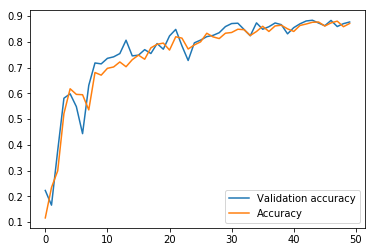

Creating network for 784-dimensional input and 10-dimensional output, with 3 hidden layers


In [90]:
exp = MNISTExperiment([200, 200, 200], [p, 0, 0], 1, epochs = 50, activation = 'sigmoid', reg_type = 0, do_print = True)

In [91]:
ps = np.linspace(1e-3,5e-3,10)

In [98]:
res = []
for p in ps:
    exp1 = ConstantExperiment(exp.N, [p, 0, 0], 1, exp.W, exp.B)
    errors = []
    for sample in tqdm(np.random.choice(range(len(exp.x_train)), 100, replace = False)):
        x = exp.x_train[sample]
        error = exp1.get_error(x, repetitions = 50000)
        mean_error = np.mean(error, axis = 1)
        errors += [mean_error]
    errors = np.mean(errors, axis = 0)
    res += [np.mean(np.abs(mean_error))]
    print(p)

  0%|          | 0/100 [00:00<?, ?it/s]

0.001


  0%|          | 0/100 [00:00<?, ?it/s]

0.0014444444444444444


  0%|          | 0/100 [00:00<?, ?it/s]

0.001888888888888889


  0%|          | 0/100 [00:00<?, ?it/s]

0.0023333333333333335


  0%|          | 0/100 [00:00<?, ?it/s]

0.002777777777777778


  0%|          | 0/100 [00:00<?, ?it/s]

0.0032222222222222222


  0%|          | 0/100 [00:00<?, ?it/s]

0.003666666666666667


  0%|          | 0/100 [00:00<?, ?it/s]

0.004111111111111111


  0%|          | 0/100 [00:00<?, ?it/s]

0.004555555555555556


100%|██████████| 100/100 [03:07<00:00,  1.87s/it]

0.005


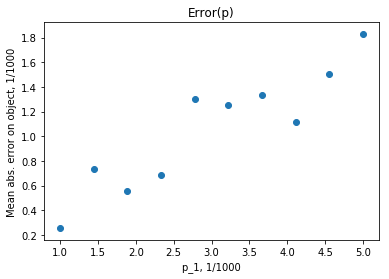

In [99]:
plt.title('Error(p)')
plt.xlabel('p_1, 1/1000')
plt.ylabel('Mean abs. error on object, 1/1000')
res = np.array(res)
plt.scatter(ps * 1000, res * 1000)

In [ ]:
# does not work for some reason
# exp.get_exact_std_error_v3_tf(exp.x_train[:2])